# 02456 Deep Learning - Acne Vulgaris vs Acne Rosacea

### Model: Retrain last layer of Inception V3 - With Augmented Data

##### Load the weights of the trained Inception V3 model and evaluate some test images found using google image search (As provided training data are classified)

This notebook is used as a small runable example to show that the network works, by classifying an input image containing lesions of either Acne Vulgaris or Acne Rosacea. 

It is possible to use your own images by adding more images into the directory "test-images". Images should contain the name of the disease and be put into the correct folder, for examples look at the images already in the folder.

The Network returns a probability of the image beloning to class 0 or 1, Vulgaris or Rosacea. 

Authors:
* s134859 Nicolai Mogensen
* s134569 Tobias Slot Jensen
* s144242 David Frich Hansen

References:

* https://keras.io/preprocessing/image/
* https://images.google.com/

##### Network was trained using a GTX 1080 Ti. If you experience OOM errors, it is probably because the network does not fit into your memory. (Weights are at most 100mb, so this should not be an issue)

In [1]:
from keras.models import load_model
import glob
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/opt/miniconda3/envs/jupyterhub/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Use the Keras .h5 format so we don't need to specify the entire model again.
model = load_model('augment.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 299, 299, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 299, 299, 3)       12        
_________________________________________________________________
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 21,806,894
Trainable params: 4,104
Non-trainable params: 21,802,790
_________________________________________________________________
None


In [5]:
files = []
for file_path in glob.iglob('**/*.jpg', recursive=True):
    files.append(file_path)

X = []
y = []
for file in files:
    patient = str(file).split("/")[-1]
    patient_type = str(file).split("/")[1]
    img = resize(imread(file),(299,299,3),mode="constant")
    #print(img.shape)
    X.append(img)
    if(patient_type == "vulgaris"):
        y.append(0)
    else:
        y.append(1)

X = np.asarray(X)
y = np.asarray(y)

# Evaluation

##### Predictions on the test-images sourced using Google Image search.


Prediction: 0 Vulgaris [ 0.6750285   0.32497153]
True: 0 Vulgaris


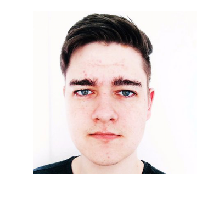


Prediction: 0 Vulgaris [ 0.97697198  0.02302797]
True: 0 Vulgaris


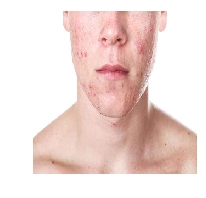


Prediction: 0 Vulgaris [ 0.9632104  0.0367896]
True: 0 Vulgaris


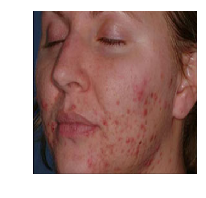


Prediction: 0 Vulgaris [ 0.99143267  0.00856729]
True: 0 Vulgaris


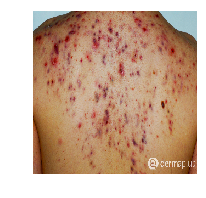


Prediction: 0 Vulgaris [ 0.70737338  0.29262659]
True: 1 Rosacea


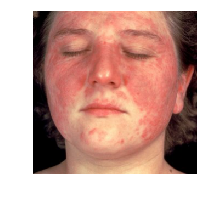


Prediction: 0 Vulgaris [ 0.85811633  0.14188367]
True: 1 Rosacea


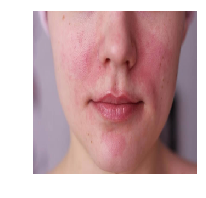


Prediction: 0 Vulgaris [ 0.56622386  0.43377614]
True: 1 Rosacea


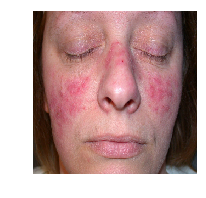


Prediction: 0 Vulgaris [ 0.64374799  0.35625201]
True: 1 Rosacea


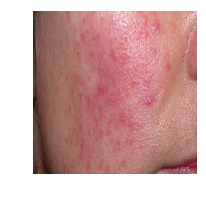


Prediction: 1 Rosacea [ 0.18401317  0.81598681]
True: 1 Rosacea


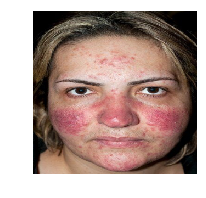

In [6]:
y_prob = model.predict(X) # Probabilities from Softmax
y_pred = np.argmax(y_prob,axis=1) # Classification

# subplot parameters
p1 = 1
p2 = 2
# Plot just the first 3 images
for i in range(len(X)):
    plt.figure(figsize = (3,3))

    plt.imshow(X[i])
    plt.axis('off')

    acne_pred = "Vulgaris"
    acne_true = "Vulgaris"
    if(y_pred[i] == 1):
        acne_pred = "Rosacea"
    if(y[i] == 1):
        acne_true = "Rosacea"

    print("\nPrediction: " + str(y_pred[i]) + " " + acne_pred + " " + str(y_prob[i]))
    print("True: " + str(y[i]) + " " + acne_true)
    plt.show()
    p1 += 2
    p2 += 2